In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

Initializing a test System

In [2]:
test_system = System('Test Sys', [SensedComp("Comp_"+str(i+1)) for i in range(3)])
print("System created with components:")
for comp in test_system.comps:
    print(comp.name)

System created with components:
Sensed Comp_1
Sensed Comp_2
Sensed Comp_3


Creating a PM maintenance function

In [ ]:
def maintenance(system):

    maintenance_period = 10

    # determine which comps need to be fixed
    for comp in system.comps:
        if comp.comp.state == 0:
            
            # making the components being repaired reflect repair time
            repair_time = [-1 for i in range(maintenance_period-1)]
            comp.comp.history += repair_time
            comp.sensedHistory+= repair_time

            #repair attached sensors as well
            for sensor in comp.sensors:
                sensor.history += repair_time   #sensor health
                sensor.readings += repair_time  #readings from component

            # reset the sensed comp to working state after PM
            comp.reset()

            # add the repair history to system history
            if len(system.history) < len(comp.comp.history):
                system.history += comp.comp.history[len(system.history):-2]
                system.sensedHistory += comp.sensedHistory[len(system.sensedHistory):-2]

        # leave the component not being repaired in thier current state until PM is done
        else:
            idle_time = [comp.comp.state for i in range(maintenance_period)]
            comp.comp.history+= idle_time
            comp.sensedHistory+= idle_time    

            # leave sensors in their current state
            for sensor in comp.sensors:
                idle_time = [sensor.state for i in range(maintenance_period)]
                sensor.history += idle_time
                idle_readings = [sensor.readings[-1] for i in range(maintenance_period)]
                sensor.readings += idle_readings        

    # update the system history to reflect the PM period
    system.reset()
    return maintenance_period

Testing PM function on a system of sensed components

Conducted PM at 16 time step.
Conducted PM at 41 time step.


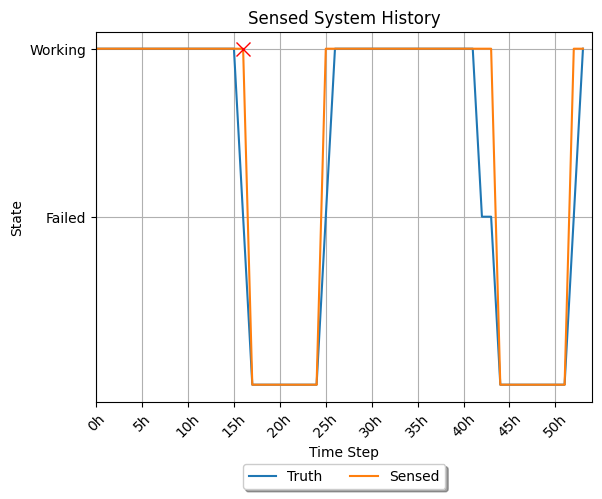

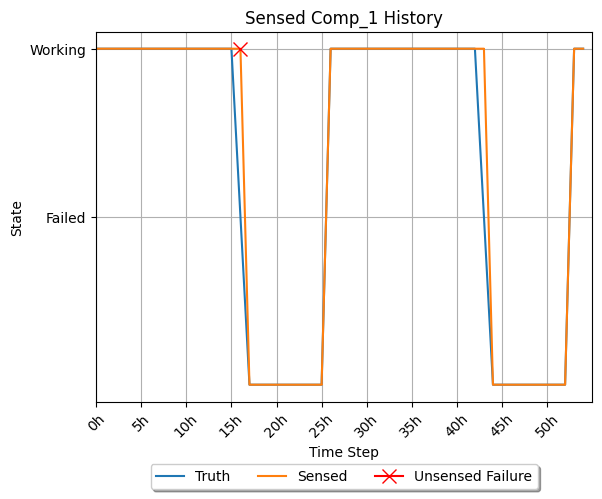

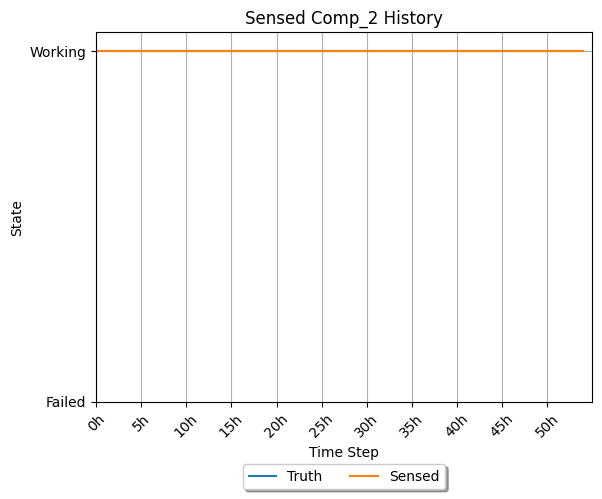

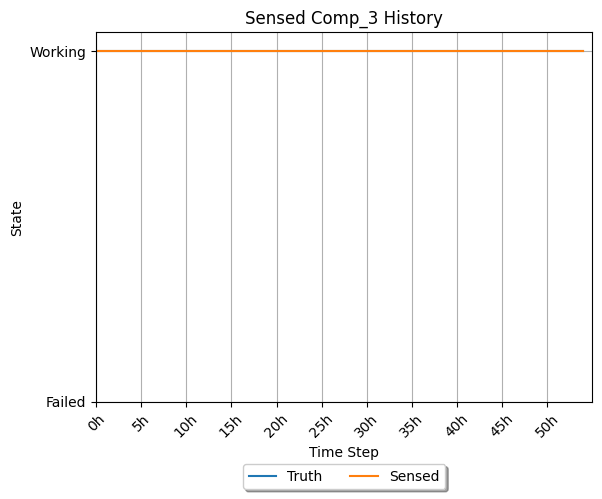

In [4]:
i = 0
while i < 50:
    test_system.simulate(1)  # simulate the system for 1 time unit

    # conduct preventive maintenance on the system once it fails
    if test_system.state == 0:
        print(f"Conducted PM at {i+1} time step.")
        PM_period = conductPM(test_system)
        i += PM_period - 1       # adjust the loop counter to account for PM time
    else:
        i += 1
        
# print the history to an Excel file and plot the results
test_system.printHistory2Excel('testResults/test_PM.xlsx')
test_system.plotHistory(True)